# GORDON LAU




# Homework #5 - MatPlot and NumPy



#Part 1 Mat Plot Lib

Using Matplotlib create the following graphs


In [1]:
# Inports Here
import matplotlib
import matplotlib.pyplot as plt


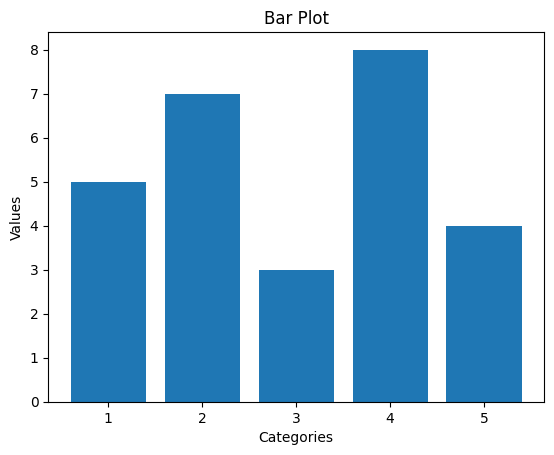

In [2]:
# Histogram
categories = list(range(1,6))
values = [5, 7, 3, 8, 4]


plt.bar(categories, values)
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')


plt.show()

# need to change values -GL


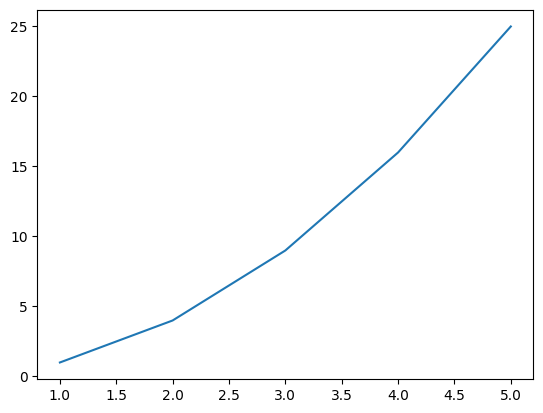

In [6]:
# Line Plot
squares = [i*i for i in range(1,6)] # set up squares from 1 to 6
plt.plot([1,2,3,4,5], squares)

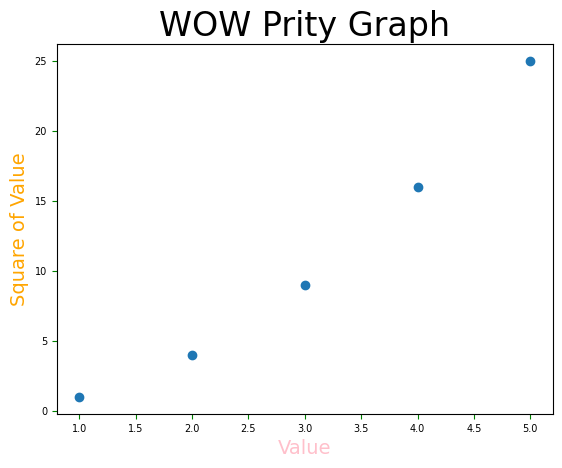

In [5]:
# Scatter Plot
squares = [i*i for i in range(1,6)]
plt.scatter(list(range(1,6)), squares)

plt.title("WOW Prity Graph", fontsize=24)
plt.xlabel("Value", fontsize=14, color='pink')
plt.ylabel("Square of Value", fontsize=14, color='orange')
plt.tick_params(axis='both', labelsize=7, color='green' ) # Set size of tick labels.

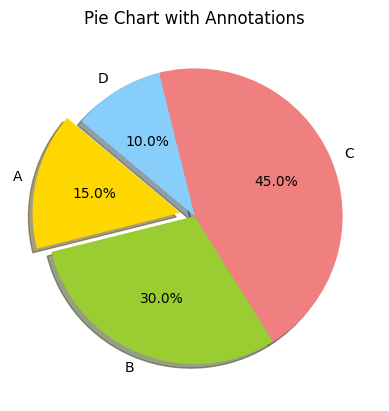

In [3]:
# Pie Plot
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
plt.title('Pie Chart with Annotations')

# Display the plot
plt.show()

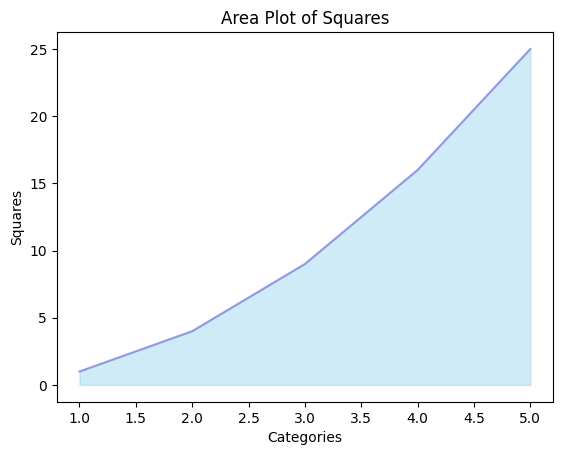

In [35]:
# Area Plot
plt.fill_between(categories, squares, color="skyblue", alpha=0.4)
plt.plot(categories, squares, color="Slateblue", alpha=0.6)
plt.title('Area Plot of Squares')
plt.xlabel('Categories')
plt.ylabel('Squares')
plt.show()



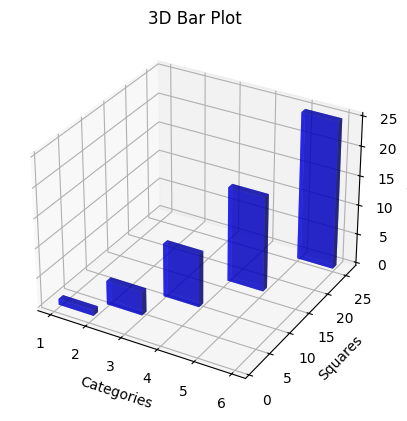

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3d Plot - Bar Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for bar plot
x = np.array(categories)
y = np.array(squares)
z = np.zeros(len(categories))

dx = np.ones(len(categories))
dy = np.ones(len(categories))
dz = y

ax.bar3d(x, y, z, dx, dy, dz, color='b', alpha=0.6)

# Data for sine wave
x_sine = np.linspace(1, 5, 100)
y_sine = np.sin(x_sine)
z_sine = np.zeros_like(x_sine)

ax.set_xlabel('Categories')
ax.set_ylabel('Squares')
ax.set_zlabel('Values')
ax.set_title('3D Bar Plot')

plt.show()

# Part 2 - Num Py
Like a dictionary, we can create a structured array in Numpy

```python
data = np.array([
    ("Billy", 32, 6),
    ("Bob", 15, 20),
    ("Jo", 80, 100),
    ("Goku", 38, 9001),],
    dtype=[("name", str, 10), 
           ("age", int), 
           ("power", int)])
```

Using the following file https://www.kaggle.com/datasets/gregorut/videogamesales

Create and sort the data by Name, Year, and NA_Sales

Do not use pandas

You can use this to help start you on your way
https://stackoverflow.com/questions/57785790/construct-structured-numpy-array-from-a-file


        

Name
Year_of_Release
Global_Sales
[['Alter Ego' '1985' '0.03']
 ['SimCity' '1988' '0.03']
 ['Doom' '1992' '0.03']
 ...
 ['Call of Duty: Infinite Warfare' '2016' '2.42']
 ['Call of Duty: Infinite Warfare' '2016' '4.46']
 ["Uncharted 4: A Thief's End" '2016' '5.38']]


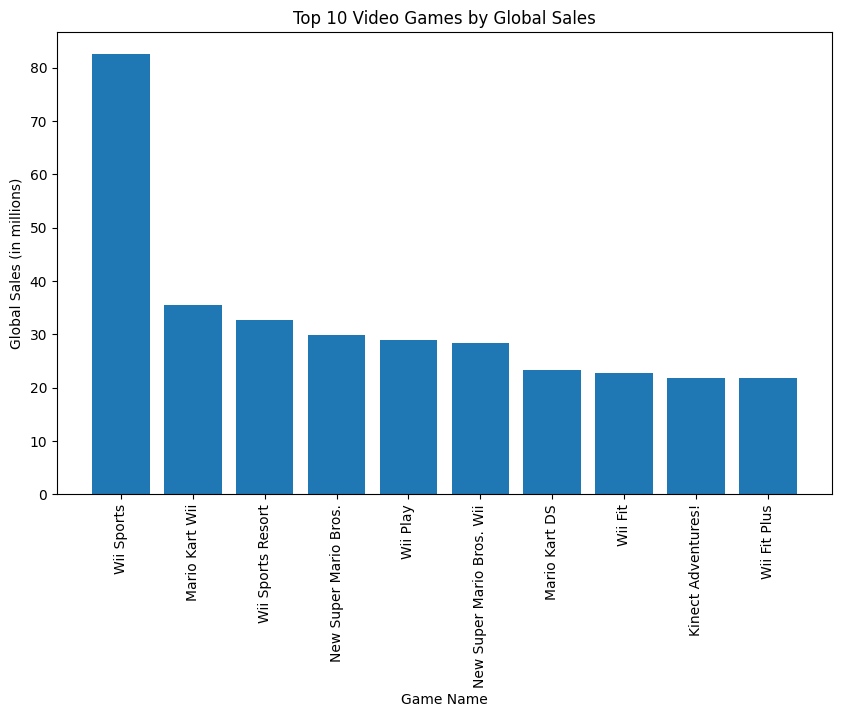

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data into a NumPy array
# file_path = 'game.csv'
file_path = 'vgsales.csv'

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    header = lines[0].strip().split(',')


# Filter the data to remove any rows that have a comma in the name
    
    data = []
    # skips the header line
    for line in lines[1:]:
        # skips lines that start with a quote, bc the values contain commas
        if line.strip().startswith('"'):
            continue
        # add the line to the data list
        data.append(line.strip().split(',',10))


    # line condensed
    # data = [line.strip().split(',', 10) for line in lines[1:] if not line.strip().startswith('"')]

# Convert the filtered data to a NumPy array
# print(data.print())
sorted_data = []

for i in data:
    sorted_data.append([i[0], i[1], i[8]])

data = np.array(sorted_data)


print(header[0])
print(header[1])
print(header[8])
print(data)

# Extract the columns for plotting
names = data[:, 0]
years = data[:, 1].astype(int)
global_sales = data[:, 2].astype(float)


sorted_indices = np.argsort(global_sales)[::-1]
sorted_names = names[sorted_indices]
sorted_global_sales = global_sales[sorted_indices]


names = sorted_names
global_sales = sorted_global_sales

plt.figure(figsize=(10, 6))
plt.bar(names[:10], global_sales[:10]) 
plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Video Games by Global Sales')
plt.xticks(rotation=90)
plt.show()